## SMS Spam Detection System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sms_df = pd.read_csv('messages datasets.csv', encoding='latin-1')

In [3]:
sms_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
sms_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## Data Cleaning

In [7]:
sms_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
sms_df.shape

(5572, 5)

In [9]:
sms_df.axes

[RangeIndex(start=0, stop=5572, step=1),
 Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')]

In [10]:
sms_df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
sms_df.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


Rename the new column names instead of the old column names.

In [12]:
sms_df.rename(columns={'v1':'message', 'v2':'text'}, inplace=True)

In [13]:
sms_df

,message,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Dropping the unnecessary columns.

In [14]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [15]:
sms_df

,message,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5572 non-null   object
 1   text     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Importing the LabelEncoder package for text transformation.

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Transforming the values of 0 and 1 instead of "ham" and "spam" text.

In [18]:
sms_df['message'] = encoder.fit_transform(sms_df['message'])

In [19]:
sms_df

,message,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
ham = sms_df['message'].value_counts().get(0)

In [21]:
spam = sms_df['message'].value_counts().get(1)

In [22]:
print(f'Total number of 0: {ham}')
print(f'Total number of 1: {spam}')

Total number of 0: 4825
Total number of 1: 747


In [23]:
sms_df.head()

,message,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
sms_df.tail()

,message,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


Finding missing values from the datasets.

In [25]:
sms_df

,message,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [26]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5572 non-null   int32 
 1   text     5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [27]:
sms_df.isnull().count()

message    5572
text       5572
dtype: int64

In [28]:
sms_df.isnull().sum()

message    0
text       0
dtype: int64

In [29]:
sms_df['message'].isnull().sum()

0

In [30]:
sms_df['text'].isnull().sum()

0

Checking for duplicate values.

In [31]:
sms_df.duplicated().sum()

403

In [32]:
sms_df['message'].duplicated().sum()

5570

In [33]:
sms_df['text'].duplicated().sum()

403

Remove the duplicate values from the data.

In [34]:
sms_df.drop_duplicates(inplace=True)

In [35]:
sms_df

,message,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [36]:
sms_df.duplicated().sum()

0

In [37]:
sms_df['message'].duplicated().sum()

5167

In [38]:
sms_df['text'].duplicated().sum()

0

In [39]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5169 non-null   int32 
 1   text     5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


## Exploratory Data Analysis (EDA)

Calculating the percentage of "ham."

In [40]:
ham = (sms_df['message'].value_counts().get(0) / len(sms_df))*100

In [41]:
ham

87.3669955503966

Calculating the percentage of "Spam."

In [42]:
spam = (sms_df['message'].value_counts().get(1) / len(sms_df))*100

In [43]:
spam

12.633004449603405

Using a pie chart to find the percentage distribution between "ham" and "spam."

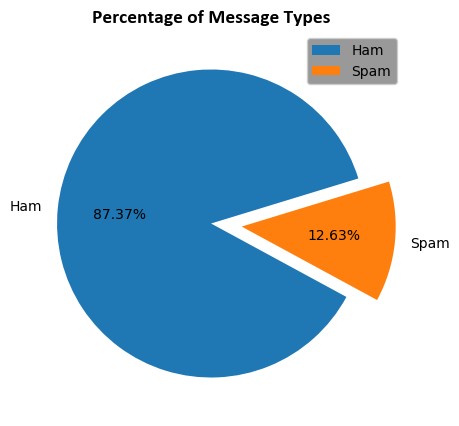

In [44]:
plt.figure(figsize=(5,5))
plt.pie(sms_df['message'].value_counts(), labels=['Ham','Spam'], explode=[0,0.2], autopct='%1.2f%%',
       startangle=17, shadow=False)
plt.title('Percentage of Message Types', color='Black', fontsize=14, fontweight='bold', fontstyle='normal', family='calibri')
plt.rcParams['axes.facecolor']='gray'
plt.legend(loc='upper right')
plt.show()

Installing one of the most useful libraries of NLTK (Natural Language Toolkit).
It is an unsurprized machine learning library.

In [45]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
import nltk

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mit
[nltk_data]     Kalariya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Adding a new column for the number of characters for each row from the text column.

In [48]:
sms_df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

Adding a new column for the number of characters in the "Text" column.

In [49]:
sms_df['num_characters'] = sms_df['text'].apply(lambda x : len(x))

In [50]:
sms_df

,message,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [51]:
sms_df['num_characters'].sum()

408237

Splitting each row by words for the "text" column.

In [52]:
sms_df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

Counting the number of words for each row.

In [53]:
sms_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [54]:
sms_df['num_words'] = sms_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [55]:
sms_df['num_words'].sum()

95385

In [56]:
sms_df

,message,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


Adding one more column to count the number of sentences for each row from the text column.

In [57]:
sms_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [58]:
sms_df['num_sentences'] = sms_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [59]:
sms_df['num_sentences'].sum()

10065

In [60]:
sms_df

,message,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


Describing the values of all.

In [61]:
sms_df[['num_characters', 'num_words', 'num_sentences']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.453279,13.324793,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.947185,1.362406,1.0,1.0,1.0,2.0,28.0


Describing the value of "Ham."

In [62]:
sms_df[sms_df['message'] == 0][['num_characters', 'num_words', 'num_sentences']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.120903,13.493725,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.799601,1.278465,1.0,1.0,1.0,2.0,28.0


Using a distplot chart for "ham."

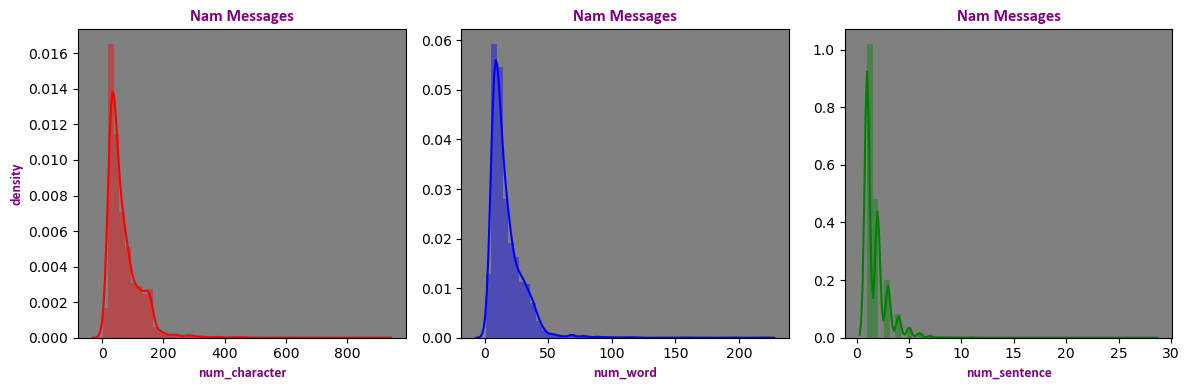

In [63]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
sns.distplot(sms_df[sms_df['message'] == 0]['num_characters'], color='red')
plt.title('Nam Messages', fontsize=12, color='Purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.xlabel('num_character', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.ylabel('density', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')

plt.subplot(1,3,2)
sns.distplot(sms_df[sms_df['message'] == 0]['num_words'], color='blue')
plt.title('Nam Messages', fontsize=12, color='Purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.xlabel('num_word', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.ylabel(None)

plt.subplot(1,3,3)
sns.distplot(sms_df[sms_df['message'] == 0]['num_sentences'], color='green')
plt.title('Nam Messages', fontsize=12, color='Purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.xlabel('num_sentence', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.ylabel(None)

plt.rcParams['axes.facecolor'] = 'White'
plt.tight_layout()
plt.show()

Describing the value of "Spam."

In [64]:
sms_df[sms_df['message'] == 1][['num_characters', 'num_words', 'num_sentences']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.967841,1.483201,1.0,2.0,3.0,4.0,8.0


Using a distplot chart for "Spam."

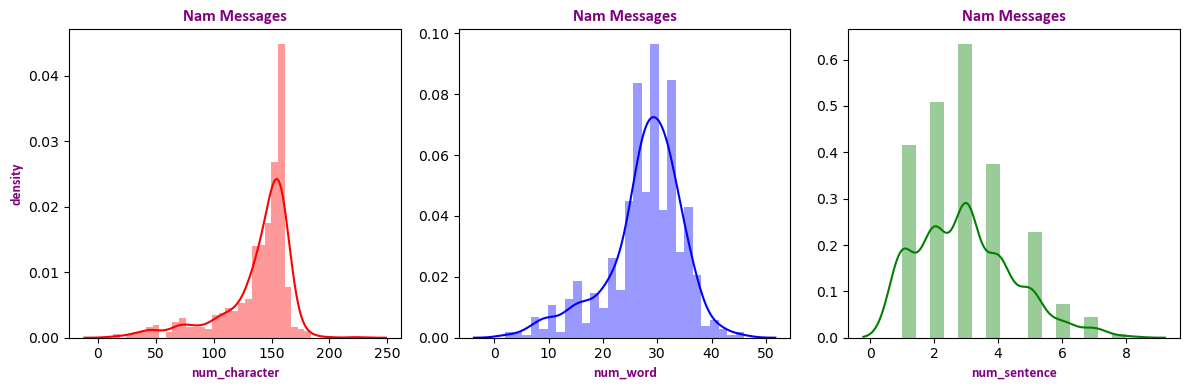

In [65]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.distplot(sms_df[sms_df['message'] == 1]['num_characters'], color='red')
plt.title('Nam Messages', fontsize=12, color='Purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.xlabel('num_character', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.ylabel('density', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')

plt.subplot(1,3,2)
sns.distplot(sms_df[sms_df['message'] == 1]['num_words'], color='blue')
plt.title('Nam Messages', fontsize=12, color='Purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.xlabel('num_word', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.ylabel(None)

plt.subplot(1,3,3)
sns.distplot(sms_df[sms_df['message'] == 1]['num_sentences'], color='green')
plt.title('Nam Messages', fontsize=12, color='Purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.xlabel('num_sentence', fontsize=10, color='purple', fontstyle='normal', fontweight='bold', family='calibri')
plt.ylabel(None)

plt.rcParams['axes.facecolor'] = 'White'
plt.tight_layout()
plt.show()

Combining "Ham" and "Spam" using a histogram.

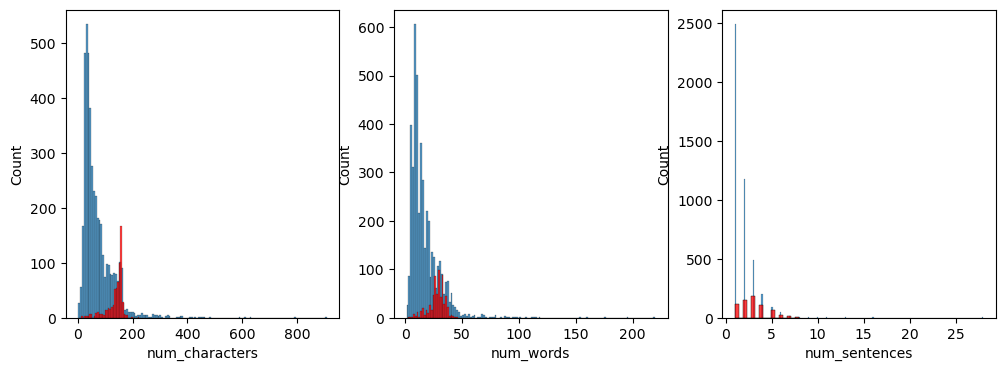

In [66]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(sms_df[sms_df['message'] == 0]['num_characters'])
sns.histplot(sms_df[sms_df['message'] == 1]['num_characters'], color='red')

plt.subplot(1,3,2)
sns.histplot(sms_df[sms_df['message'] == 0]['num_words'])
sns.histplot(sms_df[sms_df['message'] == 1]['num_words'], color='red')

plt.subplot(1,3,3)
sns.histplot(sms_df[sms_df['message'] == 0]['num_sentences'])
sns.histplot(sms_df[sms_df['message'] == 1]['num_sentences'], color='red')

plt.rcParams['axes.facecolor'] = 'White'
plt.show()

Combining "Ham" and "Spam" using a Pairplot.

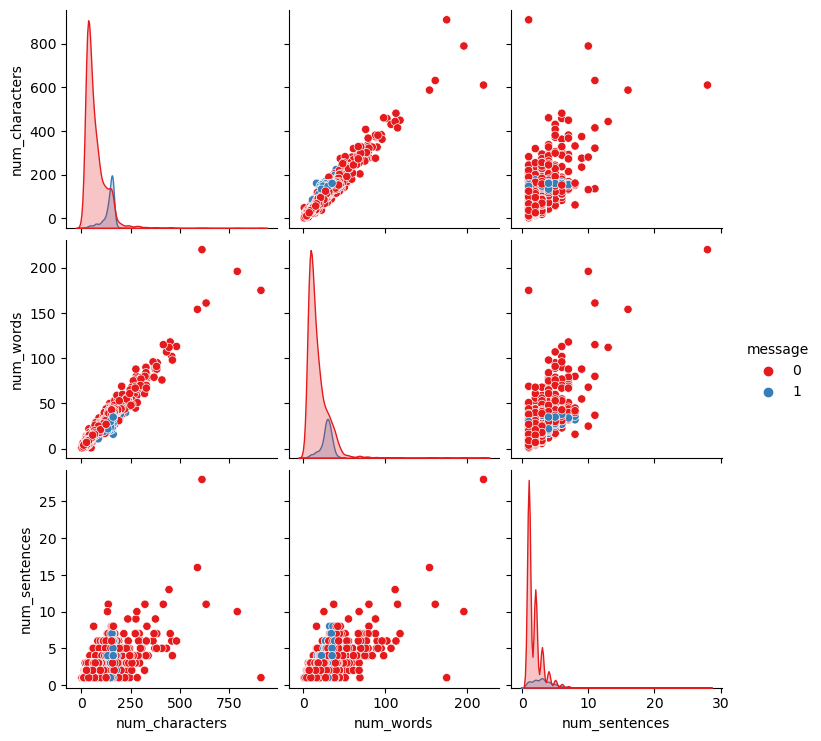

In [67]:
sns.pairplot(sms_df, hue='message', palette='Set1')
plt.rcParams['axes.facecolor'] = 'White'
plt.show()

Corelationship between "Ham" and "Spam" using Heatmap

In [68]:
sms_df.corr()

,message,num_characters,num_words,num_sentences
message,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


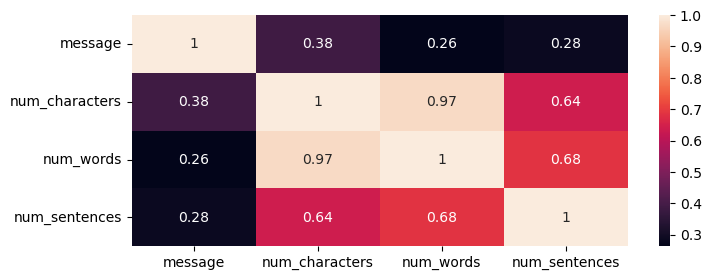

In [69]:
plt.figure(figsize=(8,3))

sns.heatmap(sms_df.corr(), annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

## Text Preprocessing

Importing package for stopwords.

In [70]:
from nltk.corpus import stopwords

In [71]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mit
[nltk_data]     Kalariya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Importing package for Punctuation

In [73]:
import string

In [74]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Importing package for Stemming

In [75]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [76]:
def transform_text(text):
    text = text.lower() # Lowercase
    text = nltk.word_tokenize(text) # Tokenization
    
    y = []
    for x in text: # Remove special characters
        if x.isalnum():
            y.append(x)
            
    text = y[:] # cloning
    y.clear()
    
    for x in text: # Remove stopword 
        if x not in stopwords.words('english') and x not in string.punctuation:
            y.append(x)
            
    text = y[:]
    y.clear()
    
    for x in text: # Remove Punctuation
        y.append(ps.stem(x))
            
    return " ".join(y)

In [77]:
transform_text('HI MIT KALARIYA@123 HOW ARE YOU !? Dancing, Loving, Runing #$% easily')

'hi mit kalariya 123 danc love rune easili'

In [78]:
sms_df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [79]:
sms_df

,message,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


Creating a new column for transformed text based on the operations performed above in the function.

In [80]:
sms_df['transformed_text'] = sms_df['text'].apply(transform_text)

In [81]:
sms_df

,message,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## Word Cloud

We need to install one of the best packages for word clouds.

In [82]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [83]:
from wordcloud import WordCloud

In [84]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Using word cloud for "ham."

In [85]:
ham_wc = wc.generate(sms_df[sms_df['message'] == 0]['transformed_text'].str.cat(sep=" "))

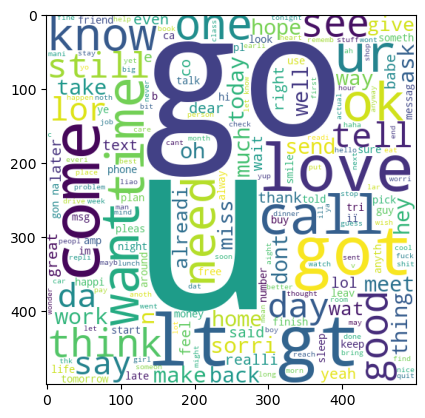

In [86]:
plt.imshow(ham_wc)

Using word cloud for "Spam."

In [87]:
spam_wc = wc.generate(sms_df[sms_df['message'] == 1]['transformed_text'].str.cat(sep=" "))

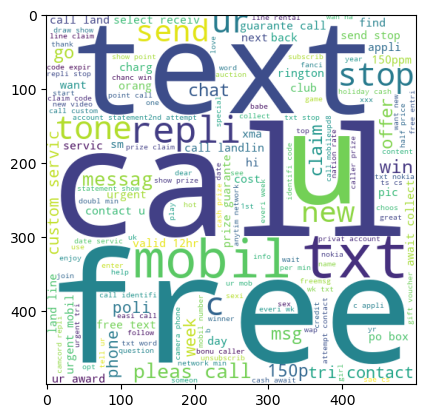

In [88]:
plt.imshow(spam_wc)

Combining "Ham" and "Spam" using a wordcloud.

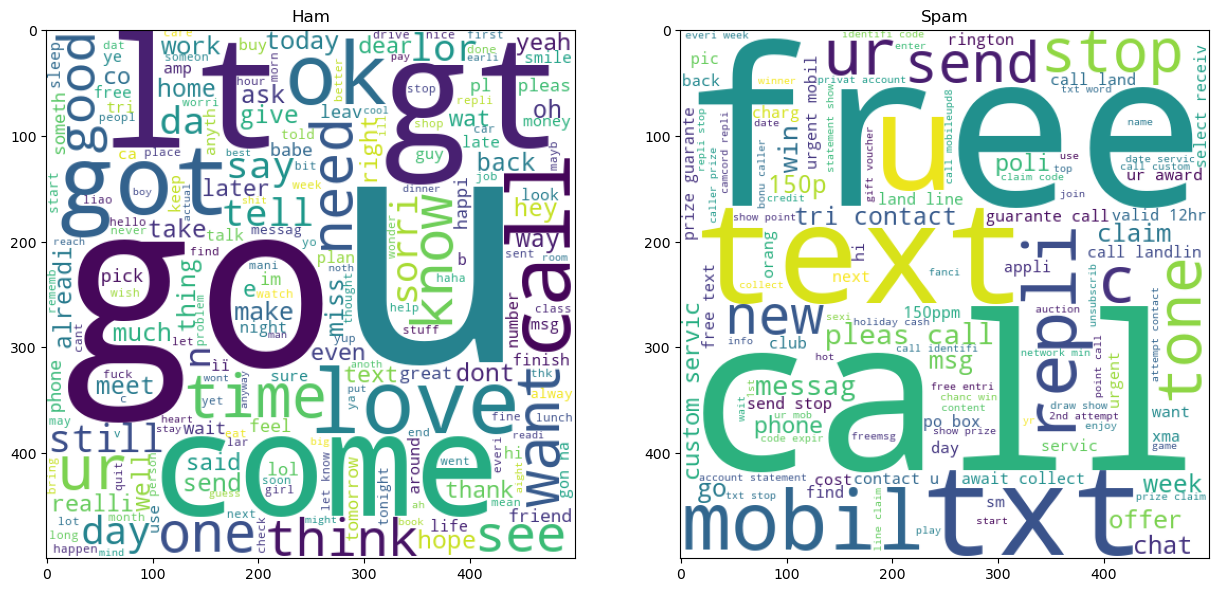

In [89]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
ham_wc = wc.generate(sms_df[sms_df['message'] == 0]['transformed_text'].str.cat(sep=" ")) # For Ham
plt.title("Ham")
plt.imshow(ham_wc)

plt.subplot(1,2,2)
spam_wc = wc.generate(sms_df[sms_df['message'] == 1]['transformed_text'].str.cat(sep=" ")) # For Spam
plt.title("Spam")
plt.imshow(spam_wc)

In [90]:
sms_df

,message,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [91]:
sms_df.head()

,message,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [92]:
sms_df.tail()

,message,text,num_characters,num_words,num_sentences,transformed_text
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


In [93]:
sms_df[sms_df['message'] == 0]['transformed_text'].tolist() # List for "Ham"

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [94]:
ham_corpus = [] # Corpus for "Ham"
for msg in sms_df[sms_df['message'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [95]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [96]:
len(ham_corpus)

35394

In [97]:
sms_df[sms_df['message'] == 1]['transformed_text'].tolist() # List for "Spam"

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [98]:
spam_corpus = [] # Corpus for "Spam"
for msg in sms_df[sms_df['message'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [99]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [100]:
len(spam_corpus)

9939

We need to install one of the best packages for make a dictionary

In [101]:
from collections import Counter

In [102]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [103]:
Counter(ham_corpus).most_common(30) # It will give the most common 30 words used.

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

In [104]:
pd.DataFrame(Counter(ham_corpus).most_common(30)) # It will convert into dataframe

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [105]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [106]:
Counter(spam_corpus).most_common(30) # It will give the most common 30 words used.

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [107]:
pd.DataFrame(Counter(spam_corpus).most_common(30)) # It will convert into dataframe

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [108]:
spam = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] # spam for ham

In [109]:
spam

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [110]:
ham = pd.DataFrame(Counter(spam_corpus).most_common(30))[1] # ham for spam

In [111]:
ham

0     320
1     191
2     155
3     141
4     122
5     119
6     119
7     114
8     104
9     103
10     98
11     97
12     82
13     74
14     64
15     64
16     63
17     60
18     57
19     57
20     56
21     55
22     52
23     51
24     51
25     49
26     48
27     45
28     45
29     45
Name: 1, dtype: int64

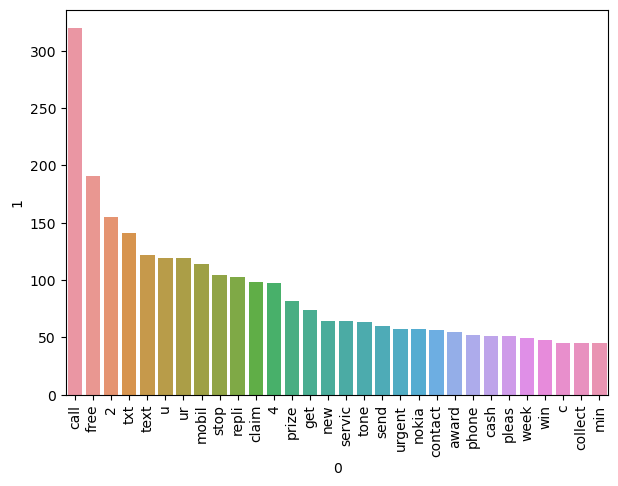

In [112]:
plt.figure(figsize=(7,5))
sns.barplot(data=sms_df, x=spam, y=ham)
plt.xticks(rotation=90)
plt.show()

In [113]:
spam = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] # Spam for ham

In [114]:
spam

0         u
1        go
2       get
3        gt
4        lt
5         2
6      come
7       got
8      know
9      like
10     call
11     time
12       ok
13     love
14     good
15     want
16       ur
17      day
18     need
19      one
20      lor
21        4
22     home
23    think
24      see
25     take
26    still
27       da
28     tell
29     make
Name: 0, dtype: object

In [115]:
ham = pd.DataFrame(Counter(ham_corpus).most_common(30))[1] # Ham for spam

In [116]:
ham

0     883
1     404
2     349
3     288
4     287
5     284
6     275
7     236
8     236
9     234
10    233
11    219
12    217
13    216
14    213
15    208
16    197
17    190
18    170
19    165
20    159
21    156
22    152
23    149
24    147
25    143
26    143
27    138
28    133
29    129
Name: 1, dtype: int64

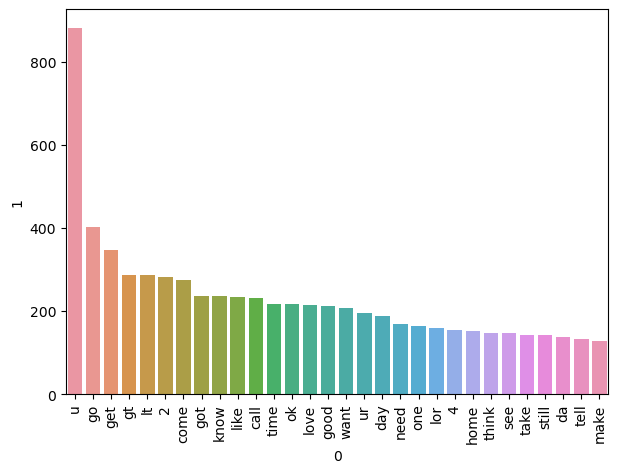

In [117]:
plt.figure(figsize=(7,5))
sns.barplot(data=sms_df, x=spam, y=ham)
plt.xticks(rotation=90)
plt.show()

## Model Building

Vectorization converts strings into numeric representations.

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [119]:
X = cv.fit_transform(sms_df['transformed_text']).toarray()

In [120]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [121]:
X.shape

(5169, 6708)

In [122]:
y = sms_df['message'].values

In [123]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [124]:
y.shape

(5169,)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [127]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [128]:
X_train.shape

(4135, 6708)

In [129]:
X_test.shape

(1034, 6708)

In [130]:
y_train.shape

(4135,)

In [131]:
y_test.shape

(1034,)

We need to install one of the best packages for checking accuracy and prediction.

In [132]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [133]:
gnbcv = GaussianNB()
mnbcv = MultinomialNB()
bnbcv = BernoulliNB()

In [134]:
gnbcv.fit(X_train, y_train)
y_pred1 = gnbcv.predict(X_test)
print(accuracy_score(y_test, y_pred1), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred1), " - Confusion Matrix")
print(precision_score(y_test, y_pred1), " - Precision Score")

0.8800773694390716  - Accuracy Score
[[792 104]
 [ 20 118]]  - Confusion Matrix
0.5315315315315315  - Precision Score


In [135]:
mnbcv.fit(X_train, y_train)
y_pred2 = mnbcv.predict(X_test)
print(accuracy_score(y_test, y_pred2), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred2), " - Confusion Matrix")
print(precision_score(y_test, y_pred2), " - Precision Score")

0.9642166344294004  - Accuracy Score
[[871  25]
 [ 12 126]]  - Confusion Matrix
0.8344370860927153  - Precision Score


In [136]:
bnbcv.fit(X_train, y_train)
y_pred3 = bnbcv.predict(X_test)
print(accuracy_score(y_test, y_pred3), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred3), " - Confusion Matrix")
print(precision_score(y_test, y_pred3), " - Precision Score")

0.9700193423597679  - Accuracy Score
[[893   3]
 [ 28 110]]  - Confusion Matrix
0.9734513274336283  - Precision Score


TFIDVectorizer is collection of row documents to a metrix of TF-IDF Features.

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv =  TfidfVectorizer()

In [138]:
X = tfv.fit_transform(sms_df['transformed_text']).toarray()

In [139]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
X.shape

(5169, 6708)

In [141]:
y = sms_df['message'].values

In [142]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
y.shape

(5169,)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [145]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
X_train.shape

(4135, 6708)

In [147]:
X_test.shape

(1034, 6708)

In [148]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
y_train.shape

(4135,)

In [150]:
y_test.shape

(1034,)

In [151]:
gnbtfv = GaussianNB()
mnbtfv = MultinomialNB()
bnbtfv = BernoulliNB()

In [152]:
gnbtfv.fit(X_train, y_train)
y_pred1 = gnbtfv.predict(X_test)
print(accuracy_score(y_test, y_pred3), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred3), " - Confusion Matrix")
print(precision_score(y_test, y_pred3), " - Precision Score")

0.9700193423597679  - Accuracy Score
[[893   3]
 [ 28 110]]  - Confusion Matrix
0.9734513274336283  - Precision Score


In [153]:
mnbtfv.fit(X_train, y_train)
y_pred2 = mnbtfv.predict(X_test)
print(accuracy_score(y_test, y_pred2), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred2), " - Confusion Matrix")
print(precision_score(y_test, y_pred2), " - Precision Score")

0.9593810444874274  - Accuracy Score
[[896   0]
 [ 42  96]]  - Confusion Matrix
1.0  - Precision Score


In [154]:
bnbtfv.fit(X_train, y_train)
y_pred3 = bnbtfv.predict(X_test)
print(accuracy_score(y_test, y_pred3), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred3), " - Confusion Matrix")
print(precision_score(y_test, y_pred3), " - Precision Score")

0.9700193423597679  - Accuracy Score
[[893   3]
 [ 28 110]]  - Confusion Matrix
0.9734513274336283  - Precision Score


We need to install more libraries for getting better accuracy and precision

In [155]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [157]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [158]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [159]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [160]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [161]:
train_classifier(knc, X_train, y_train, X_test, y_test)

(0.9003868471953579, 1.0)

In [162]:
train_classifier(mnb, X_train, y_train, X_test, y_test)

(0.9593810444874274, 1.0)

In [163]:
train_classifier(dtc, X_train, y_train, X_test, y_test)

(0.937137330754352, 0.8543689320388349)

In [164]:
train_classifier(lrc, X_train, y_train, X_test, y_test)

(0.9516441005802708, 0.94)

In [165]:
train_classifier(rfc, X_train, y_train, X_test, y_test)

(0.9738878143133463, 1.0)

In [166]:
train_classifier(abc, X_train, y_train, X_test, y_test)

(0.9613152804642167, 0.9454545454545454)

In [167]:
train_classifier(bc, X_train, y_train, X_test, y_test)

(0.9584139264990329, 0.8625954198473282)

In [168]:
train_classifier(etc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9829059829059829)

In [169]:
train_classifier(gbdt, X_train, y_train, X_test, y_test)

(0.9526112185686654, 0.9238095238095239)

In [170]:
train_classifier(xgb, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9365079365079365)

In [171]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy Score - ", current_accuracy)
    print("Precision Score - ", current_precision)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy Score -  0.9729206963249516
Precision Score -  0.9741379310344828

For  KN
Accuracy Score -  0.9003868471953579
Precision Score -  1.0

For  NB
Accuracy Score -  0.9593810444874274
Precision Score -  1.0

For  DT
Accuracy Score -  0.9352030947775629
Precision Score -  0.8380952380952381

For  LR
Accuracy Score -  0.9516441005802708
Precision Score -  0.94

For  RF
Accuracy Score -  0.9738878143133463
Precision Score -  1.0

For  AdaBoost
Accuracy Score -  0.9613152804642167
Precision Score -  0.9454545454545454

For  Bgc
Accuracy Score -  0.9584139264990329
Precision Score -  0.8625954198473282

For  ETC
Accuracy Score -  0.9758220502901354
Precision Score -  0.9829059829059829

For  GBDT
Accuracy Score -  0.9526112185686654
Precision Score -  0.9238095238095239

For  xgb
Accuracy Score -  0.9729206963249516
Precision Score -  0.9365079365079365



In [172]:
performance_sms_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy Score':accuracy_scores, 
                               "Precision Score":precision_scores}).sort_values('Accuracy Score', ascending=False)

In [173]:
performance_sms_df

,Algorithms,Accuracy Score,Precision Score
8,ETC,0.975822,0.982906
5,RF,0.973888,1.000000
0,SVC,0.972921,0.974138
10,xgb,0.972921,0.936508
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,Bgc,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.935203,0.838095


In [174]:
performance_sms_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy Score':accuracy_scores,
                                  'Precision Score':precision_scores}).sort_values('Precision Score', ascending=False)

In [175]:
performance_sms_df

,Algorithms,Accuracy Score,Precision Score
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.972921,0.936508
9,GBDT,0.952611,0.923810
7,Bgc,0.958414,0.862595


In [176]:
performance_sms_df1 = pd.melt(performance_sms_df, id_vars = 'Algorithms')

In [177]:
performance_sms_df1

,Algorithms,variable,value
0,KN,Accuracy Score,0.900387
1,NB,Accuracy Score,0.959381
2,RF,Accuracy Score,0.973888
3,ETC,Accuracy Score,0.975822
4,SVC,Accuracy Score,0.972921
5,AdaBoost,Accuracy Score,0.961315
6,LR,Accuracy Score,0.951644
7,xgb,Accuracy Score,0.972921
8,GBDT,Accuracy Score,0.952611
9,Bgc,Accuracy Score,0.958414


<Figure size 1200x500 with 0 Axes>

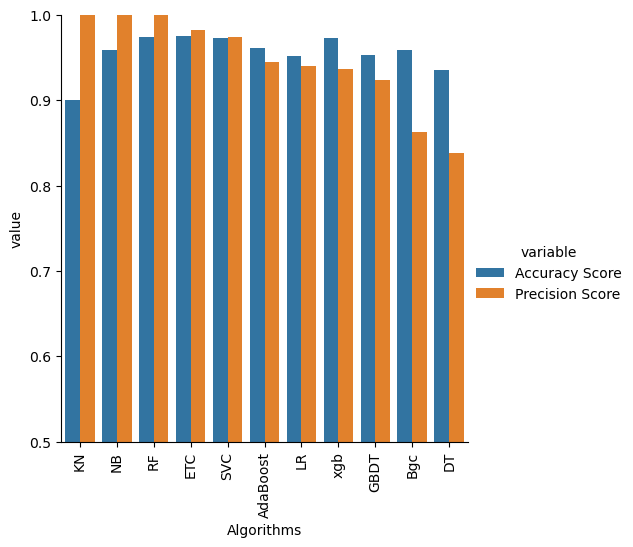

In [178]:
plt.figure(figsize=(12,5))
sns.catplot(x = 'Algorithms', y = 'value', hue = 'variable', data=performance_sms_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()

## Model Improvement

Let's try to check accuracy and precision on the top max features 3000.

In [179]:
from sklearn.feature_extraction.text import CountVectorizer # optional
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tfvmf = TfidfVectorizer(max_features=3000)

In [180]:
X = tfvmf.fit_transform(sms_df['transformed_text']).toarray()

In [181]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
X.shape

(5169, 3000)

In [183]:
y = sms_df['message'].values

In [184]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [185]:
y.shape

(5169,)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [187]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [188]:
X_train.shape

(4135, 3000)

In [189]:
X_test.shape

(1034, 3000)

In [190]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [191]:
y_train.shape

(4135,)

In [192]:
y_test.shape

(1034,)

In [193]:
gnbtfvmf = GaussianNB()
mnbtfvmf = MultinomialNB()
bnbtfvmf = BernoulliNB()

In [194]:
gnbtfvmf.fit(X_train, y_train)
y_pred1 = gnbtfvmf.predict(X_test)
print(accuracy_score(y_test, y_pred3), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred3), " - Confusion Matrix")
print(precision_score(y_test, y_pred3), " - Precision Score")

0.9700193423597679  - Accuracy Score
[[893   3]
 [ 28 110]]  - Confusion Matrix
0.9734513274336283  - Precision Score


In [195]:
mnbtfvmf.fit(X_train, y_train)
y_pred2 = mnbtfvmf.predict(X_test)
print(accuracy_score(y_test, y_pred2), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred2), " - Confusion Matrix")
print(precision_score(y_test, y_pred2), " - Precision Score")

0.9709864603481625  - Accuracy Score
[[896   0]
 [ 30 108]]  - Confusion Matrix
1.0  - Precision Score


In [196]:
bnbtfvmf.fit(X_train, y_train)
y_pred3 = bnbtfvmf.predict(X_test)
print(accuracy_score(y_test, y_pred3), " - Accuracy Score")
print(confusion_matrix(y_test, y_pred3), " - Confusion Matrix")
print(precision_score(y_test, y_pred3), " - Precision Score")

0.9835589941972921  - Accuracy Score
[[895   1]
 [ 16 122]]  - Confusion Matrix
0.991869918699187  - Precision Score


In [197]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [198]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [199]:
train_classifier(knc, X_train, y_train, X_test, y_test)

(0.9052224371373307, 1.0)

In [200]:
train_classifier(mnb, X_train, y_train, X_test, y_test)

(0.9709864603481625, 1.0)

In [201]:
train_classifier(dtc, X_train, y_train, X_test, y_test)

(0.9294003868471954, 0.8282828282828283)

In [202]:
train_classifier(lrc, X_train, y_train, X_test, y_test)

(0.9584139264990329, 0.9702970297029703)

In [203]:
train_classifier(rfc, X_train, y_train, X_test, y_test)

(0.9748549323017408, 0.9827586206896551)

In [204]:
train_classifier(abc, X_train, y_train, X_test, y_test)

(0.960348162475822, 0.9292035398230089)

In [205]:
train_classifier(bc, X_train, y_train, X_test, y_test)

(0.9574468085106383, 0.8671875)

In [206]:
train_classifier(etc, X_train, y_train, X_test, y_test)

(0.9748549323017408, 0.9745762711864406)

In [207]:
train_classifier(gbdt, X_train, y_train, X_test, y_test)

(0.9477756286266924, 0.92)

In [208]:
train_classifier(xgb, X_train, y_train, X_test, y_test)

(0.9661508704061895, 0.9256198347107438)

In [209]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy Score - ", current_accuracy)
    print("Precision Score - ", current_precision)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy Score -  0.9758220502901354
Precision Score -  0.9747899159663865

For  KN
Accuracy Score -  0.9052224371373307
Precision Score -  1.0

For  NB
Accuracy Score -  0.9709864603481625
Precision Score -  1.0

For  DT
Accuracy Score -  0.9303675048355899
Precision Score -  0.8173076923076923

For  LR
Accuracy Score -  0.9584139264990329
Precision Score -  0.9702970297029703

For  RF
Accuracy Score -  0.9748549323017408
Precision Score -  0.9827586206896551

For  AdaBoost
Accuracy Score -  0.960348162475822
Precision Score -  0.9292035398230089

For  Bgc
Accuracy Score -  0.9574468085106383
Precision Score -  0.8671875

For  ETC
Accuracy Score -  0.9748549323017408
Precision Score -  0.9745762711864406

For  GBDT
Accuracy Score -  0.9477756286266924
Precision Score -  0.92

For  xgb
Accuracy Score -  0.9661508704061895
Precision Score -  0.9256198347107438



In [210]:
performance_sms_dfmf = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy Score_max_fit_3000':accuracy_scores, 
                               "Precision Score_max_fit_3000":precision_scores}).sort_values('Accuracy Score_max_fit_3000', ascending=False)

In [211]:
performance_sms_dfmf

,Algorithms,Accuracy Score_max_fit_3000,Precision Score_max_fit_3000
0,SVC,0.975822,0.974790
5,RF,0.974855,0.982759
8,ETC,0.974855,0.974576
2,NB,0.970986,1.000000
10,xgb,0.966151,0.925620
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
7,Bgc,0.957447,0.867188
9,GBDT,0.947776,0.920000
3,DT,0.930368,0.817308


In [212]:
performance_sms_dfmf = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy Score_max_fit_3000':accuracy_scores,
                                  'Precision Score_max_fit_3000':precision_scores}).sort_values('Precision Score_max_fit_3000', ascending=False)

In [213]:
performance_sms_dfmf

,Algorithms,Accuracy Score_max_fit_3000,Precision Score_max_fit_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,Bgc,0.957447,0.867188


In [214]:
performance_sms_dfmf2 = pd.melt(performance_sms_dfmf, id_vars = 'Algorithms')

In [215]:
performance_sms_dfmf2

,Algorithms,variable,value
0,KN,Accuracy Score_max_fit_3000,0.905222
1,NB,Accuracy Score_max_fit_3000,0.970986
2,RF,Accuracy Score_max_fit_3000,0.974855
3,SVC,Accuracy Score_max_fit_3000,0.975822
4,ETC,Accuracy Score_max_fit_3000,0.974855
5,LR,Accuracy Score_max_fit_3000,0.958414
6,AdaBoost,Accuracy Score_max_fit_3000,0.960348
7,xgb,Accuracy Score_max_fit_3000,0.966151
8,GBDT,Accuracy Score_max_fit_3000,0.947776
9,Bgc,Accuracy Score_max_fit_3000,0.957447


<Figure size 1200x500 with 0 Axes>

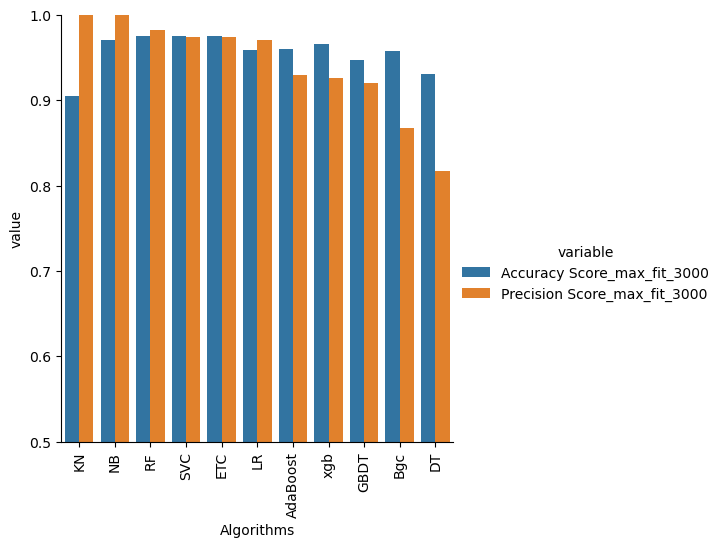

In [216]:
plt.figure(figsize=(12,5))
sns.catplot(x = 'Algorithms', y = 'value', hue = 'variable', data=performance_sms_dfmf2, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()

In [217]:
performance_sms_df.merge(performance_sms_dfmf, on='Algorithms')

,Algorithms,Accuracy Score,Precision Score,Accuracy Score_max_fit_3000,Precision Score_max_fit_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,xgb,0.972921,0.936508,0.966151,0.925620
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,Bgc,0.958414,0.862595,0.957447,0.867188


Importing vectorizer and model files for converting into website

In [218]:
import pickle

In [219]:
pickle.dump(tfvmf, open('vectorizer.pkl', 'wb')) # wb stands for write binary mode
pickle.dump(mnb, open('model.pkl', 'wb'))